In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
%matplotlib inline

## **Testing random choice **

In [5]:
%%time
p = 0.4
N = 10**1
p= np.random.choice([1,0], N,p=[p, 1-p]).sum()/N
print(p)


0.8
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.26 ms


## testing average matrix from numpy

In [6]:
data = np.array([[0, 1],
       [2, 3],
       [4, 5]])
np.average(data, axis=0,weights=[1./4, 2./4, 1/4])

array([ 2.,  3.])

# Class for a single population

In [93]:
class population:
    def __init__(self, plist, N):
        self.plist = np.array(plist)
        self.N = N
        
        self.Rb = 1
        self.k = 20000
        self.rd = 10**(-3)
    
    def update(self):
        birth = int(self.N*self.Rb*(1 - self.N/self.k))
        
        if birth == 0: Birthplist = np.zeros(len(self.plist))
        else:Birthplist = np.array([np.random.choice([1,0], birth,p=[pi, 1-pi]).sum()/birth for pi in self.plist])

        death = self.rd*self.N**2
        survived = int(self.N - death)
        if survived == 0: Survivingplist = np.zeros(len(self.plist))
        Survivingplist = np.array([np.random.choice([1,0], survived ,p=[pi, 1-pi]).sum()/survived for pi in self.plist])
        
        self.N += birth - death
        
        birthNSurvivedMatrix = np.array([Birthplist, Survivingplist])
        self.plist = np.average(birthNSurvivedMatrix, axis = 0, weights=[birth/self.N,survived/self.N])
        

        
        
    def Hlist(self): return np.array([2*p*(1-p) for p in self.plist])
    def averageH(self): return self.Hlist().mean()
        
        
        
    
    

# One Population Simulation

In [63]:
plista = np.array([np.random.rand() for i in range(10)])
Na = 200
sidea = population(plista, Na)

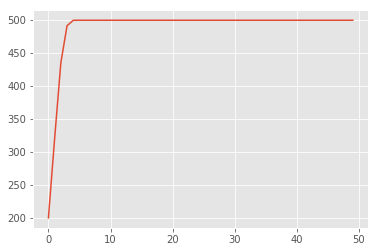

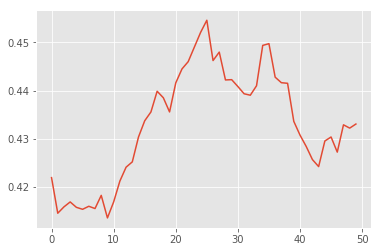

CPU times: user 364 ms, sys: 356 ms, total: 720 ms
Wall time: 314 ms


In [64]:
%%time
history = []
Hhistory = []
for i in range(50): 
    history += [sidea.N] 
    Hhistory += [sidea.averageH()]
    sidea.update()
    
plt.plot(history, label = "popsize");
plt.show()
plt.plot(Hhistory, label = 'H');
plt.show()


# Making class to Simulate migration

In [85]:
class wholePop:
    def __init__(self, populationA, populationB): 
        self.popa = populationA
        self.popb = populationB
        self.alphaA = .2
        self.alphaB = .2
        self.deathprob = .3
        self.nRoadsCrossedPerTimeUnit = 3
    def migrate(self):
        
        AtoB = self.alphaA*self.popa.N
        survivedAtoB = (1-self.deathprob)*AtoB
        BtoA = self.alphaB*self.popb.N
        survivedBtoA = (1- self.deathprob)*BtoA
        
        self.popa.N += survivedBtoA - AtoB
        self.popb.N += survivedAtoB - BtoA
        
    def update(self):
        self.popa.update() 
        self.popb.update()
        self.migrate()
        
    def FSTlist(self):
        PfreqMatrix = np.array([self.popa.plist, self.popb.plist])
        avgPFreq = np.average(PfreqMatrix, axis = 0 , weights = [.5,.5])
        expectedHlist = np.array([2*p*(1-p) for p in avgPFreq])
        
        HlistMatrixFromPops = np.array([self.popa.Hlist(), self.popb.Hlist()])
        ObservedHlistBothPops = np.average(HlistMatrixFromPops, axis = 0,  weights = [.5,.5])
        
        return (expectedHlist - ObservedHlistBothPops)/ expectedHlist
    
    def FST(self): return self.FSTlist().mean()
        
        

# Adding another population

In [94]:
plist = np.array([np.random.rand() for i in range(10)])
Na = 500
sidea = population(plist, Na)
sideb = population(plist, Na)
bothsides = wholePop(sidea, sideb)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


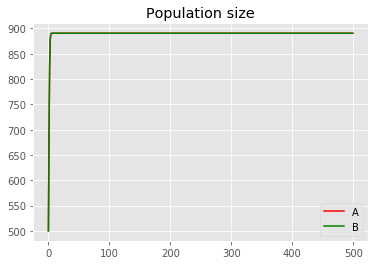

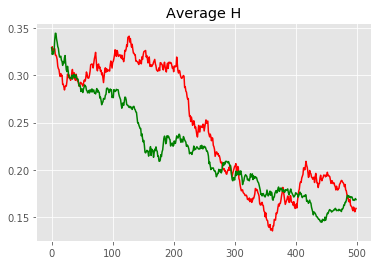

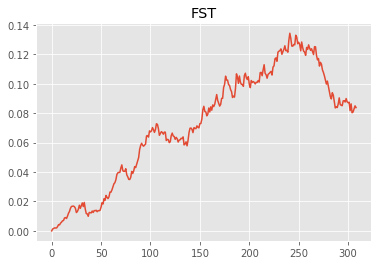

CPU times: user 1.46 s, sys: 700 ms, total: 2.16 s
Wall time: 1.4 s


In [95]:
%%time
historyA = []; historyB = []
HhistoryA = []; HhistoryB = []
FST_list = []
for i in range(500): 
    historyA += [bothsides.popa.N] 
    HhistoryA += [bothsides.popa.averageH()]
    historyB += [bothsides.popb.N] 
    HhistoryB += [bothsides.popb.averageH()]
    FST_list += [bothsides.FST()]
    bothsides.update()

    
plt.plot(historyA, label = "A", color = 'r');
plt.plot(historyB, label = "B", color = 'g');
plt.title("Population size")
plt.legend()
plt.show()
plt.plot(HhistoryA, label = 'A', color = 'r');
plt.plot(HhistoryB, label = 'B', color = 'g');
plt.title('Average H')
plt.show()
plt.plot(FST_list)
plt.title('FST')
plt.show()

## reset values
plist = np.array([np.random.rand() for i in range(10)])
Na = 100
sidea = population(plist, Na)
sideb = population(plist, Na)
bothsides = wholePop(sidea, sideb)